#Approach-1

In [ ]:
import random

  # 1. [Start] Generate random population of n chromosomes (suitable solutions for the problem)
  # 2. [Fitness] Evaluate the fitness f(x) of each chromosome x in the population
  # 3. [New population] Create a new population by repeating following steps until the new population is complete
    # A. [Selection] Select two parent chromosomes from a population according to their fitness (the better fitness, the bigger chance to be selected)
    # B. [Crossover] With a crossover probability cross over the parents to form a new offspring (children). If no crossover was performed, offspring is an exact copy of parents.
    # C. [Mutation] With a mutation probability mutate new offspring at each locus (position in chromosome).
    # D. [Accepting] Place new offspring in a new population
  # 4. [Replace] Use new generated population for a further run of algorithm
  # 5. [Test] If the end condition is satisfied, stop, and return the best solution in current population
  # 6 [Loop] Go to step 2

def knapsack(V, W, MAX, popSize, mut, maxGen, percent):
  generation = 0
  pop = generate(V, popSize)
  fitness = getFitness(pop, V, W, MAX)
  while(not test(fitness, percent) and generation < maxGen):
    generation += 1
    pop = newPopulation(pop, fitness, mut)
    fitness = getFitness(pop, V, W, MAX)
  #print fitness
  #print generation
  return selectElite(pop, fitness)

def generate(V, popSize):
  length = len(V)
  pop = [[random.randint(0,1) for i in range(length)] for j in range(popSize)]
  #print pop
  return pop
  
def getFitness(pop, V, W, MAX):
  fitness = []
  for i in range(len(pop)):
    weight = 0
    volume = MAX+1
    while (volume > MAX):
      weight = 0
      volume = 0
      ones = []
      for j in range(len(pop[i])):
        if pop[i][j] == 1:
          volume += V[j]
          weight += W[j]
          ones += [j]
      if volume > MAX:
        pop[i][ones[random.randint(0, len(ones)-1)]] = 0
    fitness += [weight]
  #print "Modified Population:"
  #print pop
  #print "Fitness of Population:"
  #print fitness
  return fitness
  

def newPopulation(pop, fit, mut):
  popSize = len(pop)
  newPop = []
  newPop += [selectElite(pop, fit)]
  #print "Elite:"
  #print newPop
  while(len(newPop) < popSize):
    (mate1, mate2) = select(pop, fit)
    newPop += [mutate(crossover(mate1, mate2), mut)]
    
  #print "After Selection"
  #print newPop
  return newPop
  
def selectElite(pop, fit):
  elite = 0
  for i in range(len(fit)):
    if fit[i] > fit[elite]:
      elite = i
  return pop[elite]

def select(pop, fit):
  size = len(pop)
  totalFit = sum(fit)
  lucky = random.randint(0, totalFit)
  tempSum = 0
  mate1 = []
  fit1 = 0
  for i in range(size):
    tempSum += fit[i]
    if tempSum >= lucky:
      mate1 = pop.pop(i)
      fit1 = fit.pop(i)
      break
  tempSum = 0
  lucky = random.randint(0, sum(fit))
  for i in range(len(pop)):
    tempSum += fit[i]
    if tempSum >= lucky:
      mate2 = pop[i]
      pop += [mate1]
      fit += [fit1]
      return (mate1, mate2)

def crossover(mate1, mate2):
  lucky = random.randint(0, len(mate1)-1)
  #print "Lucky: " + str(lucky)
  return mate1[:lucky]+mate2[lucky:]
  
def mutate(gene, mutate):
  for i in range(len(gene)):
    lucky = random.randint(1, mutate)
    if lucky == 1:
      print("MUTATED!")
      gene[i] = bool(gene[i])^1
  return gene
    
def test(fit, rate):
  maxCount = mode(fit)
  if float(maxCount)/float(len(fit)) >= rate:
    return True
  else:
    return False

def mode(fit):
  values = set(fit)
  maxCount = 0
  for i in values:
    if maxCount < fit.count(i):
      maxCount = fit.count(i)
  return maxCount





In [ ]:
volume = [1, 3, 2, 3, 2, 3, 3]
weights = [2, 100, 5, 3, 50, 16, 60]
maxVolume = 6
popSize = 10
mut = 10
maxGen = 100
percent = 0.50

print(crossover(volume, weights))

print(mutate([1, 1, 1, 1, 1, 1, 1, 1, 1], mut))

print("FINAL SOLUTION: " + str(knapsack(volume, weights, maxVolume, popSize, mut, maxGen, percent)))

[1, 100, 5, 3, 50, 16, 60]
[1, 1, 1, 1, 1, 0, 1, 1, 1]
FINAL SOLUTION: [0, 1, 0, 0, 0, 0, 1]


In [ ]:
import math 

def avgDev(values) :
  sum = 0.0;
  for value in values :
    sum+=value
  mean = sum/len(values)
  
  i = 0
  avgDev = []
  while i < len(values):
    avgDev.append( abs(mean - values[i]) )
    i+=1
  
  sum = 0.0
  for dev in avgDev: 
    sum+=dev
  avgDevMean = sum/len(avgDev)
  
  return "Mean: "+str(mean)+" \nAvg Dev: "+str(avgDevMean)+" \nPercent Dev "+str(avgDevMean/mean*100)+"%"
  
HCl = [-59.9, -59.4, -58.0]

Acetic = [-51.7, -51.5, -50.9]

metal = [24.56, 24.86, 24.60]

Ka = [1.2e-3, 1.6e-3, 1.6e-3]

Ka1 = [5.4e-3, 6.6e-3, 5.9e-3]

Ka2 = [2.3e-10, 2.1e-10, 2.0e-10]

#print avgDev(HCl)
#print avgDev(Acetic)

print(avgDev(Ka2))

Mean: 2.1333333333333335e-10 
Avg Dev: 1.1111111111111116e-11 
Percent Dev 5.208333333333335%


In [ ]:
from time import time

def experiment(incr, trials, sets, reps):
  i = 8
  while i < trials:
    i += 1
    j = 0
    trialTime = 0.0
    while j < sets:
      j += 1
      size = i*incr
      V = [random.randint(1,size) for n in range(size)]
      W = [random.randint(1,size) for n in range(size)]
      MAX = random.randint(1,size*4)
      k = 0
      setTime = 0
      weights = []
      while k < reps:
        k += 1
        t1 = time()
        winner = knapsack(V, W, MAX, 100, 100, 10*size, 0.9)
        t2 = time()
        setTime += t2-t1
        #print winner
        weights += [evaluateAnswer(winner, V, W, MAX)]
        #print answer
      print("Trial "+str(i)+" Set: "+str(j))
      print("Volumes: " + str(V))
      print("Weights: " + str(W))
      print("Max Volume: " + str(MAX))
      print("Weights Found: " + str(weights))
      print(avgDev(weights))
      print("Average Time: "+str(setTime/reps))
      print("")
      trialTime += setTime/reps
    print("Set "+str(i)+" avg time :"+str(trialTime/trials))
    print("")
    
def evaluateAnswer(gene, V, W, MAX):
  volume = 0
  weight = 0
  for j in range(len(gene)):
      if gene[j] == 1:
        volume += V[j]
        weight += W[j]
  if volume > MAX:
    print("ERROR!!! VOLUME IS GREATER THAN MAX VOLUME!")
  return weight
      
experiment(10, 10, 10, 10)

#Approach-2

In [ ]:
!git clone https://github.com/megics/knapsack-GA.git

Cloning into 'knapsack-GA'...
remote: Enumerating objects: 28, done.
remote: Total 28 (delta 0), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (28/28), done.


Enter a test file number: 5


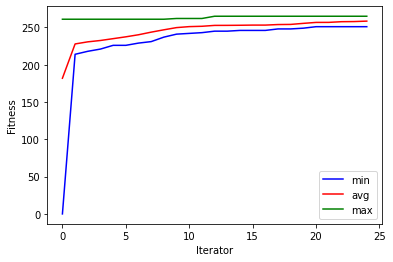

In [ ]:
import math
import matplotlib.pyplot as plt

randomList = []
weightList = []
valueList = []
randCount = 0

### read the file section ###
txtNum = input('Enter a test file number: ')        # file number can be:1, 2, 3, 4, 5
f = open("/content/knapsack-GA/input/test{0}.txt".format(txtNum),"r")
randomList = f.readline().strip('\n').split(",")  	# comma separated random list
populationSize = int(f.readline().strip('\n')) 	    # population size
k = f.readline() 	                                # number of tournament elements
m = float(f.readline().strip('\n'))		            # mutation probability[0-1]
iteration = int(f.readline().strip('\n')) 	        # number of iteration
bagSize = int(f.readline().strip('\n')) 	        # bag size
weightList = f.readline().strip('\n').split(",") 	# comma separated weight list
valueList = f.readline().strip('\n').split(",") 	# comma separated value list
f.close()

### create population method ###
def initialise():  
	person = ""
	personList = []
	global randCount
	for x in range(populationSize):
		for z in range(len(weightList)):
			if(randCount == len(randomList)):
				randCount=0
			if(float(randomList[randCount%len(randomList)]) < 0.5):
				person += "0"
			else:
				person += "1"

			randCount+=1		
		personList.append(person)
		person = ""
	return personList	

### create fitness values list for population in this method ###
def evaluate(pList):
	sumWeight=0
	sumValue=0
	fitnessList = []
	for i in range(len(pList)):
		for j in range(len(pList[i])):
			if(pList[i][j] == "1"):
				sumWeight += int(weightList[j])
				sumValue += int(valueList[j])
		if(sumWeight <= bagSize):
			fitnessList.append((pList[i],sumValue))
		else:
			fitnessList.append((pList[i],0))
		sumWeight=0
		sumValue=0
	return fitnessList

### using tournament select algorithm for parent select in this method ###
def parentSelect(fList):
	tempList = []
	parentSelectList = []
	global randCount
	for i in range(len(fList)):
		for j in range(int(k)):
			if(randCount == len(randomList)):
				randCount=0
			index = math.ceil(float(randomList[randCount%len(randomList)])*len(fList))-1
			tempList.append(fList[index])
			randCount+=1
		tempList.sort()
		parentSelectList.append(tempList[0])
		tempList = []
	return parentSelectList

### recombine parents and create child list in this method ###
def recombine(pList):
	childList = []
	global randCount
	for i in range(int(len(pList)/2)):
		if(randCount == len(randomList)):
			randCount=0
		index = math.ceil(float(randomList[randCount%len(randomList)])*len(weightList))-1
		randCount+=1	
		c1=pList[i][0][:index]+pList[i+1][0][index:]
		c2=pList[i+1][0][:index]+pList[i][0][index:]
		childList.append(c1)
		childList.append(c2)
	return childList

### mutation apply the child list and create mutation list in this method ### 
def mutation(cList):
	mutationList = []
	global randCount
	for i in range(len(childList)):
		for j in range(len(weightList)):
			if(randCount == len(randomList)):
				randCount=0
			if(float(randomList[randCount%len(randomList)]) < m):
				if(childList[i][j]=="0"):
					temp = list(childList[i])
					temp[j] = "1"
					childList[i] = "".join(temp)
				else:
					temp = list(childList[i])
					temp[j] = "0"
					childList[i] = "".join(temp)	
			randCount+=1					
		mutationList.append(childList[i])				
	
	return mutationList	

### choose the best childrens in this method ###
def survivorSelect(cList, pList):
	childEva = evaluate(cList)
	eva = list(childEva + pList)
	eva.sort(key=lambda srt: srt[1],reverse=True)

	return eva[:len(pList)]	

### main section ###
if __name__=='__main__':
	i = 0
	minList = []
	maxList = []
	avg = 0
	avgList = []
	itList = range(iteration)

	populationList=initialise()
	fitnessList=evaluate(populationList)

	while(i < iteration):
		avg = 0
		parentSelectedList = parentSelect(fitnessList)
		childList = recombine(parentSelectedList)	
		mutationList = mutation(childList)
		survivorList = survivorSelect(mutationList,fitnessList)

		for j in range(len(survivorList)):
			avg += int(survivorList[j][1])

		avgList.append(avg/len(survivorList))
		minList.append(min(survivorList,key=lambda srt: srt[1])[1])
		maxList.append(max(survivorList,key=lambda srt: srt[1])[1])
		fitnessList = survivorList	
		i += 1

	### display graphic for min, max and average values ###
	plt.plot(itList,minList,c='blue')
	plt.plot(itList,avgList,c='red')
	plt.plot(itList,maxList,c='green')		
	plt.xlabel('Iterator')
	plt.ylabel('Fitness')
	plt.legend(["min","avg","max"])
	plt.show()

#Approach - 3

In [ ]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt
item_number = np.arange(1,11)
weight = np.random.randint(1, 15, size = 10)
value = np.random.randint(10, 750, size = 10)
knapsack_threshold = 35    #Maximum weight that the bag of thief can hold 
print('The list is as follows:')
print('Item No.   Weight   Value')
for i in range(item_number.shape[0]):
    print('{0}          {1}         {2}\n'.format(item_number[i], weight[i], value[i]))

The list is as follows:
Item No.   Weight   Value
1          3         205

2          12         343

3          10         235

4          3         365

5          3         57

6          14         379

7          11         374

8          1         549

9          2         392

10          5         693



In [ ]:
solutions_per_pop = 14
pop_size = (solutions_per_pop, item_number.shape[0])
print('Population size = {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
num_generations = 50 #change
print('Initial population: \n{}'.format(initial_population))

Population size = (14, 10)
Initial population: 
[[1 0 0 1 0 0 1 0 1 0]
 [1 1 0 0 1 1 0 0 1 0]
 [0 1 1 0 0 1 1 0 0 0]
 [0 0 1 0 1 0 1 1 1 1]
 [0 0 1 0 0 1 1 0 0 0]
 [1 0 0 0 1 0 1 0 1 1]
 [1 0 0 0 0 0 0 1 1 0]
 [1 1 0 1 0 1 0 1 0 1]
 [0 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 0 1 0 1 0 1]
 [0 0 1 0 0 0 1 1 0 0]
 [0 1 0 1 1 0 0 1 0 0]
 [1 0 0 1 1 0 1 1 1 0]
 [0 1 1 1 1 1 0 1 1 1]]


In [ ]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)    

In [ ]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
    return parents

In [ ]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.46 #change
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings    

In [ ]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.35 #change
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants   

In [ ]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [ ]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
selected_items = item_number * parameters
print('\nSelected items that will maximize the knapsack without breaking it:')
for i in range(selected_items.shape[1]):
  if selected_items[0][i] != 0:
     print('{}\n'.format(selected_items[0][i]))

Last generation: 
[[1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 1 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 0 0 1 1 1 1]
 [1 0 1 0 1 0 1 0 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 0 1 0 1 1 1 1]]

Fitness of the last generation: 
[2505 2505 2505 2505 2505 2505 2505    0 2505 2448 1956 2505 2505 2505]

The optimized parameters for the given inputs are: 
[array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1])]

Selected items that will maximize the knapsack without breaking it:
1

3

5

7

8

9

10



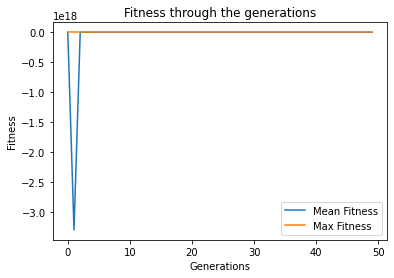

(50, 14)


In [ ]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)

# Approach - 4

In [ ]:
!git clone https://github.com/SaxMan96/Genetic-Algorithm.git

Cloning into 'Genetic-Algorithm'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 40 (delta 8), reused 30 (delta 5), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [1]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
from itertools import product

class Task:
    def __init__(self, size=None):
        if size == None:
            size = 100
        self.size = np.random.randint(size, 2 * size)
        self.Weight_limit = np.random.randint(10 * self.size, 20 * self.size)
        self.Size_limit = np.random.randint(10 * self.size, 20 * self.size)
        while True:
            self.weights = np.round(np.random.random(self.size) * 10 * self.Weight_limit / self.size, 5)
            self.sizes = np.round(np.random.random(self.size) * 10 * self.Size_limit / self.size, 5)
            self.costs = np.round(np.random.random(self.size) * self.size, 5)
            if self.weights.sum() > 2 * self.Weight_limit and self.sizes.sum() > 2 * self.Size_limit:
                break

generated_task = Task(size=25)
generated_task.__dict__

{'size': 39,
 'Weight_limit': 496,
 'Size_limit': 608,
 'weights': array([ 56.52838,  31.33461, 118.19096,  28.61998,  70.83709,  59.22506,
         68.80955, 111.70405, 123.69006,   9.57388,  28.9228 ,  35.74578,
         14.24849,  42.42218,  17.88503,  42.31242,  23.65224, 117.85339,
         78.03108,  47.00393,  60.60608, 108.39761,  87.40994, 117.33601,
         90.02365,  12.33586,  66.03656,  75.51487, 108.46229,  27.36151,
          8.8093 ,  35.86078,  62.72716,  59.36926,  16.55357, 123.13775,
         36.67358,  25.37093,  85.84989]),
 'sizes': array([101.64045, 135.36433, 121.79713,  31.88071, 107.11539, 145.65495,
          2.91586,  88.18754,  22.4411 , 143.21679,  73.11214,  40.81474,
        138.32085,  41.63389, 154.94963, 151.41364, 134.10839, 100.51535,
         65.19928, 109.02785,  24.85778, 128.18312,  49.91182, 105.96156,
          7.15607,  41.99547,  53.09727,  38.98887, 135.64542,  84.404  ,
         69.62719,  43.51039,  57.29841,  52.53876,  44.50732,   8.4

In [2]:
class Individual:
    def __init__(self, genome):
        self.genome = genome

    def evaluate(self, task):
        weight_sum = (self.genome * task.weights).sum()
        sizes_sum = (self.genome * task.sizes).sum()
        costs_sum = (self.genome * task.costs).sum()
        if weight_sum <= task.Weight_limit and sizes_sum <= task.Size_limit:
            return costs_sum
        else:
            return 0

    def mutate(self, mutation_rate):
        genome_size = self.genome.shape[0]
        no_of_genes_to_change = int(np.ceil(genome_size * mutation_rate))
        genes_to_change = random.choices(range(genome_size), k=no_of_genes_to_change)
        self.genome[genes_to_change] = -self.genome[genes_to_change] + 1


class Population:
    def __init__(self, genome_size=None, pop_size=None):
        self.population = []
        if genome_size != None and pop_size != None:
            population_array = np.random.choice(
                [0, 1], size=(pop_size, genome_size), p=[0.85, 0.15]
            )
            for genome in population_array:
                individual = Individual(genome)
                self.population.append(individual)
        self.size = len(self.population)

    def tournament(self, tournament_size, task):
        selected = random.choices(self.population, k=tournament_size)
        evaluation = [elem.evaluate(task) for elem in selected]
        idx_best_individual = evaluation.index(max(evaluation))
        return selected[idx_best_individual]

    def crossover(self, crossover_rate, parent_1, parent_2, task):
        if np.random.random() < crossover_rate:
            splitting_point = np.random.randint(1, len(parent_1.genome))
            result_genome = np.concatenate(
                [parent_1.genome[:splitting_point], parent_2.genome[splitting_point:]]
            )
            result = Individual(result_genome)
        else:
            result = parent_1
        return result

    def add_child(self, child):
        self.population.append(child)
        self.size = len(self.population)

    def best(self, task):
        evaluation = [individual.evaluate(task) for individual in self.population]
        idx_best_individual = evaluation.index(max(evaluation))
        best = self.population[idx_best_individual]
        return best, best.evaluate(task)

    def evaluate(self, task):
        evaluation = np.array(
            [individual.evaluate(task) for individual in self.population]
        )
        return evaluation

class GeneticAlgorithm:
    def __init__(
        self, populations_size, tournament_size, crossover_rate, mutation_rate
    ):
        self.populations_size = populations_size
        self.tournament_size = tournament_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def fit(self, iterations, task, show_tqdm=False):
        population = Population(genome_size=task.size, pop_size=self.populations_size)
        best_history = []
        best_genome_history = []
        mean_evalueation_history = []
        the_best_individual, the_best_evaluation = population.best(task)
        if show_tqdm:
            iterator = tqdm(range(iterations))
        else:
            iterator = range(iterations)
        for _ in iterator:
            new_population = Population()
            for _ in range(population.size):
                parent_1 = population.tournament(self.tournament_size, task)
                parent_2 = population.tournament(self.tournament_size, task)
                child = population.crossover(self.crossover_rate, parent_1, parent_2, task)
                child.mutate(self.mutation_rate)
                new_population.add_child(child)

            best_individual, best_evaluation = population.best(task)
            best_genome_history.append(best_individual.genome)
            if best_evaluation > the_best_evaluation:
                the_best_individual = best_individual
                the_best_evaluation = best_evaluation
            best_history.append(best_evaluation)

            mean_evalueation_history.append(population.evaluate(task).mean())

            population = new_population

        return (
            the_best_individual,
            best_history,
            best_genome_history,
            mean_evalueation_history,
        )
    
    def test_param(self, params, cases, iterations, task):
        param_name = list(params.keys())[0]
        test_set = list(params.values())[0]
        measured_param_history = []
        total=cases * len(test_set)
        t = tqdm(
            enumerate(list(product(test_set, range(cases)))),
            total=total
        )
        for i, (param, test_case) in t:
            test_histories = []
            if param_name == "Crossover rate":
                self.crossover_rate = param
            elif param_name == "Mutation rate":
                self.mutation_rate = param
            elif param_name == "Population size":
                self.populations_size = param
            elif param_name == "Tournament size":
                self.tournament_size = param
            else:
                raise Exception("param_name", "wrong")

            best, best_history, best_evaluation, mean_evalueation_history = self.fit(iterations, task)
            test_histories.append(best_history)
            measured_param_history.append(test_histories)
        return measured_param_history

In [3]:

parameters = {
    'populations_size': 50,
    'tournament_size': 10,
    'crossover_rate': 0.9,
    'mutation_rate':  0.0001, 
}

genetic_algorithm = GeneticAlgorithm(**parameters)

In [4]:
best, best_history, best_evaluation, mean_evalueation_history = genetic_algorithm.fit(iterations=200, task=generated_task)

In [5]:
best.genome

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

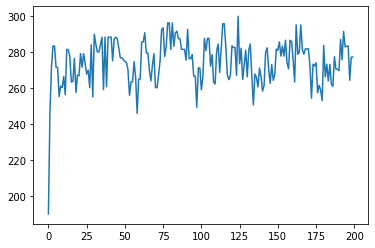

In [6]:
plt.plot(best_history);

In [7]:
print(*best_evaluation[:5], sep='\n')

[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0]
[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0]
[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1
 0 0]
[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0
 0 0]
[0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 0 0]


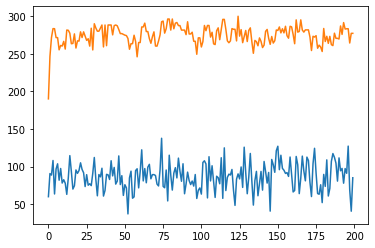

In [8]:
plt.plot(mean_evalueation_history)
plt.plot(best_history);

In [39]:
class TestGeneticAlgorithm:
    def __init__(self, parameters, task, cases, iterations):
        self.iterations = iterations
        self.parameters = parameters
        self.cases = cases
        self.task = task
        self.genetic_algorithm = GeneticAlgorithm(**self.parameters)
    
    def plot_tests_history(self):
        param_name = list(self.test_params.keys())[0]
        test_set = list(self.test_params.values())[0]

        subplots_no = self.measured_param_history.shape[0]
        iterations_no = self.measured_param_history.shape[2]
        
        fig, axs = plt.subplots(1, subplots_no, sharey=True)
        fig.set_size_inches(20, 5)
        #fig.suptitle("Evaluation " + param_name, fontsize=20)
        for i, test_histories in enumerate(self.measured_param_history):
            min_val = round(test_histories.min(), 2)
            max_val = round(test_histories.max(), 2)

            test_histories_array = np.array(test_histories)
            y = test_histories_array.mean(axis=0)
            x = np.array(range(test_histories_array.shape[1]))
            y_err = test_histories_array.std(axis=0)
#             ax = plt.subplot(1, subplots_no, i + 1)
            ax = axs[i]
            ax.set_title("{}: {} | Best: {}".format(param_name, test_set[i], str(max_val)), fontsize=15)
            ax.errorbar(
                x=x,
                y=y,
                yerr=y_err,
                ecolor="yellow",
                elinewidth=25,
                color="black",
                linewidth=4,
                capsize=2,
            )
            ax.set_xlabel("Iterations", fontsize=12)
            axs[0].set_ylabel("Mean evaluation", fontsize=12)
        plt.show()
        
        
    def run(self, test_params):
        self.test_params = test_params
        test_params_no = len(list(test_params.values())[0])
        
        self.measured_param_history = self.genetic_algorithm.test_param(
            cases=self.cases, 
            params=self.test_params, 
            iterations=self.iterations, 
            task=self.task
        )
        self.measured_param_history = np.array(self.measured_param_history).reshape(test_params_no, self.cases, self.iterations)
        self.plot_tests_history()

In [65]:
generated_task = Task(size=25)
parameters = {
    'populations_size': 15,
    'tournament_size': 10,
    'crossover_rate': 0.75,
    'mutation_rate':  0.001, 
}
ITERATIONS = 50
TEST_CASES = 4

test_gen_alg = TestGeneticAlgorithm(
    parameters=parameters,
    task=generated_task,
    cases=TEST_CASES, 
    iterations=ITERATIONS
)

  0%|          | 0/20 [00:00<?, ?it/s]

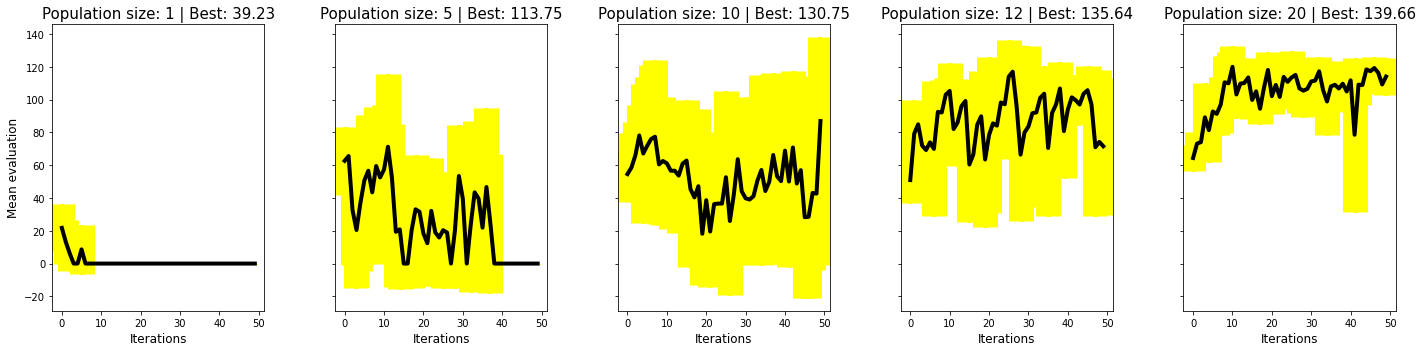

In [68]:
test_gen_alg.run(test_params={"Population size": [1, 5, 10, 12, 20]})

  0%|          | 0/20 [00:00<?, ?it/s]

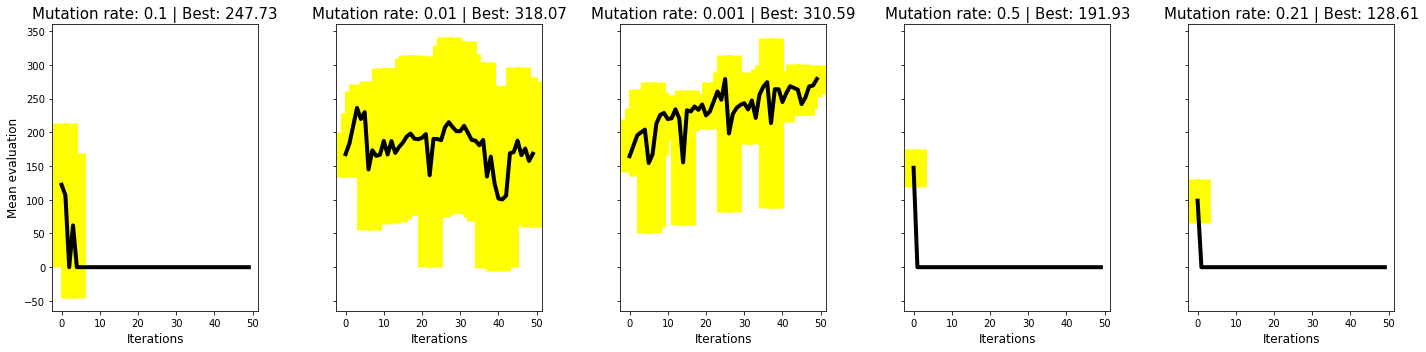

In [64]:
test_gen_alg.run(test_params={"Mutation rate": [0.1, 0.01, 0.001, 0.5, 0.21]})

  0%|          | 0/20 [00:00<?, ?it/s]

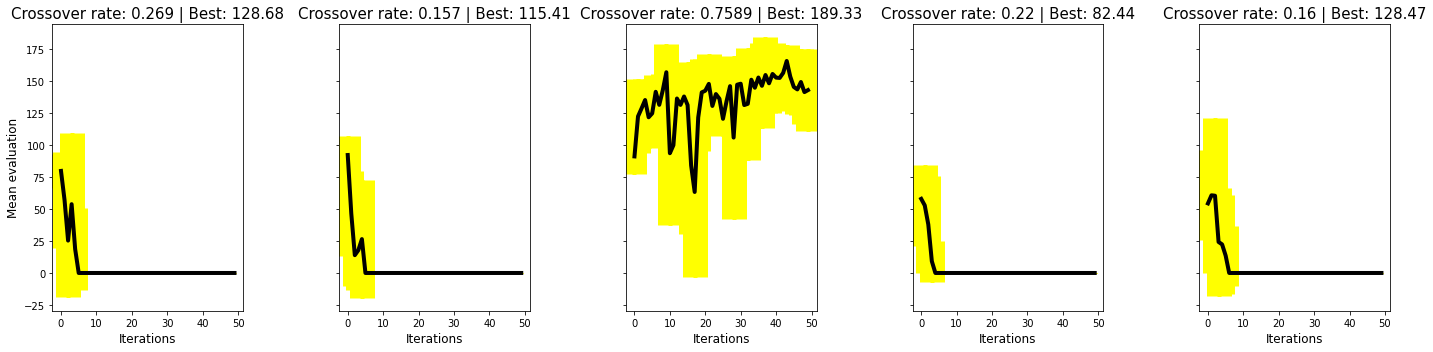

In [54]:
test_gen_alg.run(test_params={"Crossover rate": [0.269, 0.157, 0.7589, 0.22, 0.16]})

  0%|          | 0/12 [00:00<?, ?it/s]

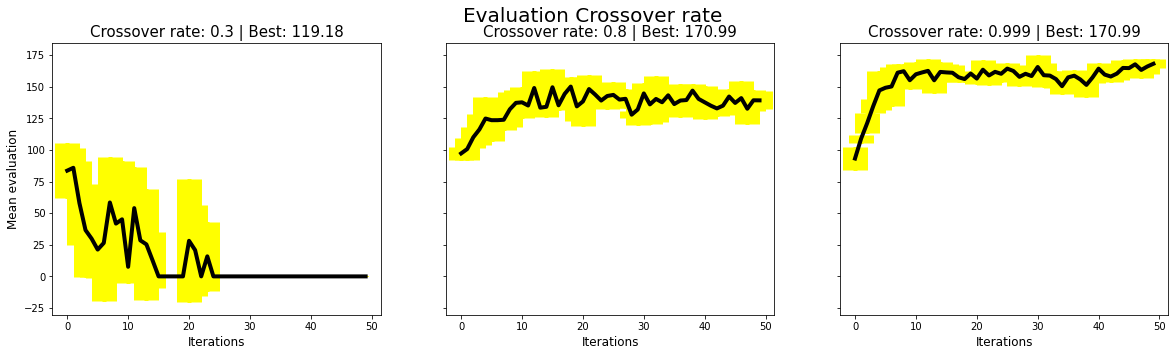

In [26]:
test_gen_alg.run(test_params={"Crossover rate": [0.3, 0.8, 0.999]})

  0%|          | 0/12 [00:00<?, ?it/s]

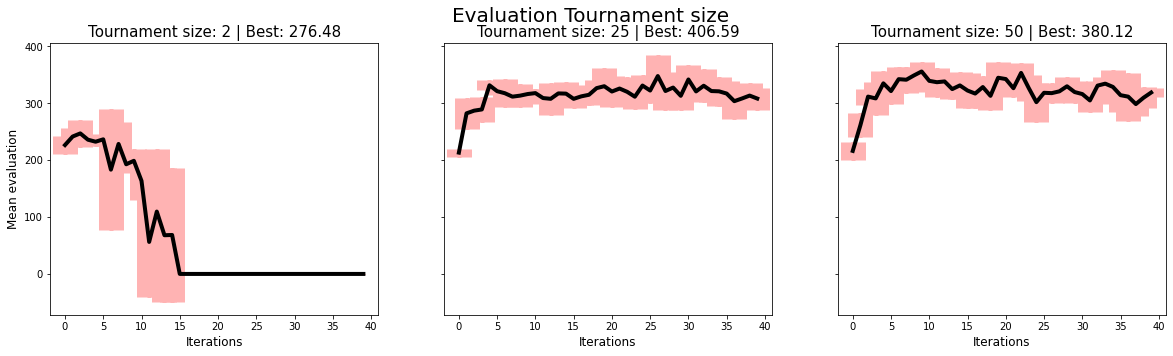

In [17]:
test_gen_alg.run(test_params={"Tournament size": [2, 25, 50]})

In [19]:
parameters = {
    'populations_size': 100,
    'tournament_size': 50,
    'crossover_rate': 0.9,
    'mutation_rate':  0.0001, 
}

ITERATIONS = 200
TEST_CASES = 5

generated_task = Task(size=50)
genetic_algorithm = GeneticAlgorithm(**parameters)
the_best_individual, best_history, best_genome_history, mean_evalueation_history = genetic_algorithm.fit(iterations=ITERATIONS, task=generated_task, show_tqdm=True)



  0%|          | 0/200 [00:00<?, ?it/s]

[443.141606, 537.5682219, 865.8351295000002, 599.6167661000001, 581.0182381, 487.2996335, 381.892098, 447.05717029999994, 676.6120649, 616.6826517, 434.13274160000003, 604.4531618, 554.9420838000001, 689.7173499000002, 447.5088532999999, 621.198151, 619.5970111, 553.6603585, 601.7203020000001, 612.6472488, 746.3838440000001, 352.7515707, 645.5485070999999, 682.8317809, 545.7338945, 428.93106090000003, 457.6147687, 597.3800348, 578.3653137, 486.2580328, 651.8731683000001, 542.7721693, 630.1542729, 540.7673139999999, 461.5721486, 267.0048188, 613.9593953, 556.0408010000001, 610.7373773, 459.95470780000005, 567.6531496, 687.5474253, 447.397948, 567.6292118, 425.042414, 620.8194549, 448.5709736, 407.93999780000007, 640.8994696, 424.9229718, 680.8656569, 614.3448733, 443.9687644, 655.7566755999999, 620.0938758, 471.62552150000005, 510.3201929999999, 726.2618497, 477.02370440000004, 537.9006194, 382.8543706, 792.5943016000002, 466.0819363, 618.6895901, 540.4600186, 675.8544125000001, 601.759

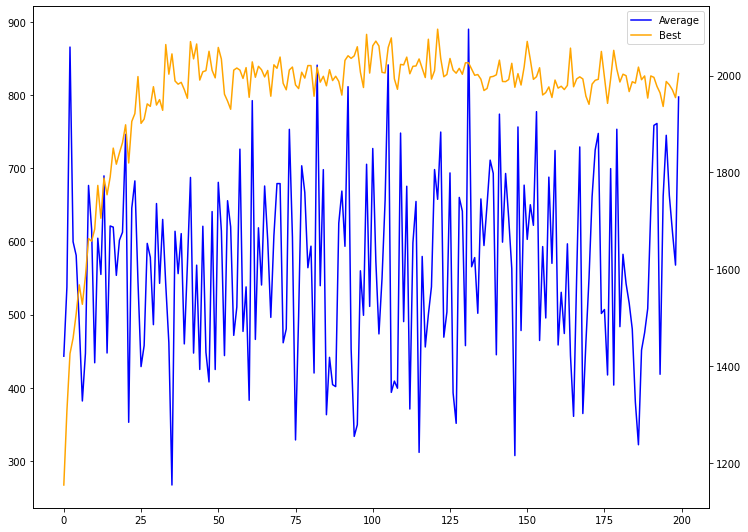

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True

print(mean_evalueation_history)
speed = np.array(mean_evalueation_history)
acceleration = np.array(best_history)

ax1 = plt.subplot()
l1, = ax1.plot(speed, color='blue')
ax2 = ax1.twinx()
l2, = ax2.plot(acceleration, color='orange')

plt.legend([l1, l2], ["Average", "Best"])

plt.show()

[443.141606, 537.5682219, 865.8351295000002, 599.6167661000001, 581.0182381, 487.2996335, 381.892098, 447.05717029999994, 676.6120649, 616.6826517, 434.13274160000003, 604.4531618, 554.9420838000001, 689.7173499000002, 447.5088532999999, 621.198151, 619.5970111, 553.6603585, 601.7203020000001, 612.6472488, 746.3838440000001, 352.7515707, 645.5485070999999, 682.8317809, 545.7338945, 428.93106090000003, 457.6147687, 597.3800348, 578.3653137, 486.2580328, 651.8731683000001, 542.7721693, 630.1542729, 540.7673139999999, 461.5721486, 267.0048188, 613.9593953, 556.0408010000001, 610.7373773, 459.95470780000005, 567.6531496, 687.5474253, 447.397948, 567.6292118, 425.042414, 620.8194549, 448.5709736, 407.93999780000007, 640.8994696, 424.9229718, 680.8656569, 614.3448733, 443.9687644, 655.7566755999999, 620.0938758, 471.62552150000005, 510.3201929999999, 726.2618497, 477.02370440000004, 537.9006194, 382.8543706, 792.5943016000002, 466.0819363, 618.6895901, 540.4600186, 675.8544125000001, 601.759

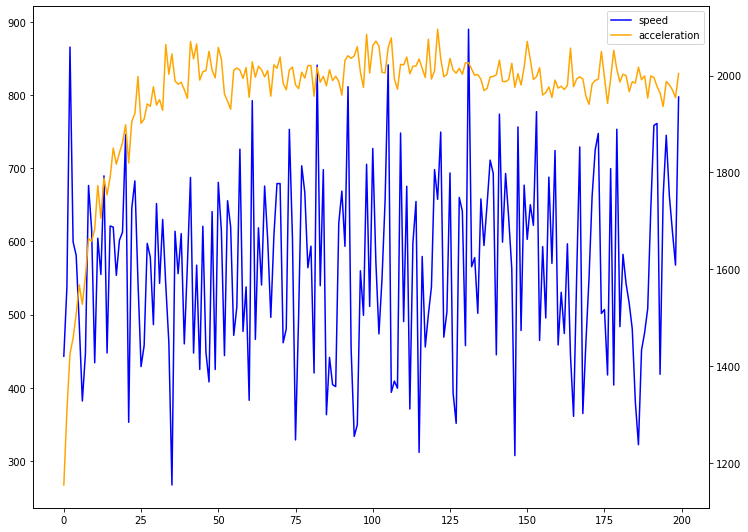

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True

print(mean_evalueation_history)
speed = np.array(mean_evalueation_history)
acceleration = np.array(best_history)

ax1 = plt.subplot()
l1, = ax1.plot(speed, color='blue')
ax2 = ax1.twinx()
l2, = ax2.plot(acceleration, color='orange')

plt.legend([l1, l2], ["Average", "Best"])

plt.show()

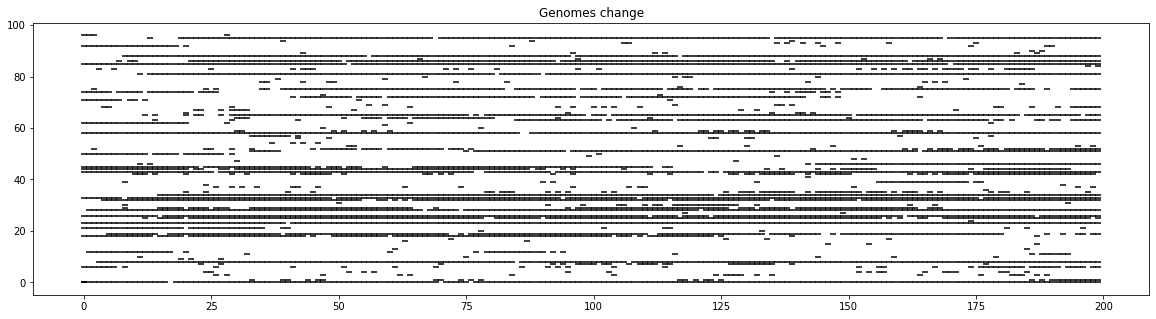

In [21]:
import numpy as np
data = np.array(best_genome_history)
fig, ax = plt.subplots()

fig.set_size_inches(20,5)
for col_no in range(data.shape[1]):
    col = data[:, col_no].copy()
    x = col*range(col.shape[0])
    col *= col_no
    plt.scatter(x, col, marker='_', c='k')
    plt.title("Genomes change")
